Import all libraries, assign alias to some libraries

In [11]:
import rasterio

In [12]:
import earthpy
from rasterio.plot import show

In [13]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

Call Landsat 5 input image (a tiff file) with rasterio 

In [16]:
image = rasterio.open('/test_images/subset_0_of_LT05_L1TP_180032_20060727_20180311_01_T1_reprojected.tif')

Assign names of bands from test image

In [17]:
green = image.read(2)
nir = image.read(4)

Normalized difference water index

In [24]:
ndwi = es.normalized_diff(green,nir)

Display output

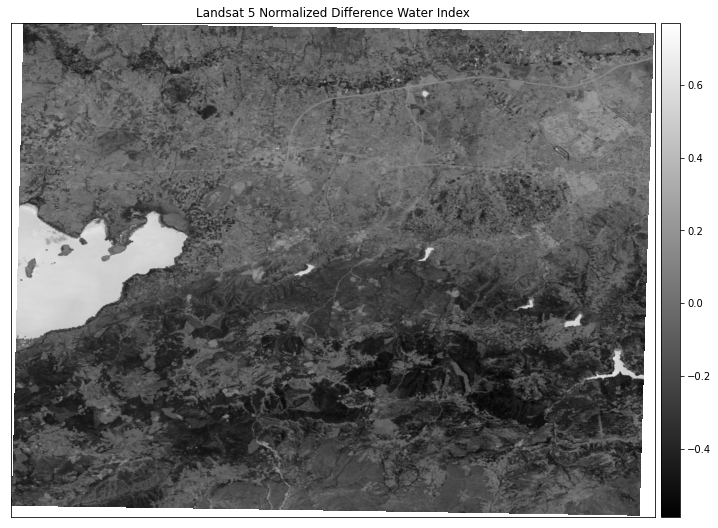

In [28]:
titles = ["Landsat 5 Normalized Difference Water Index"]

ep.plot_bands(ndwi, cmap="gray", cols=1, title=titles)
plt.show()

Create output ass a tiff file (one band)

In [27]:
meta = image.profile
meta.update(driver='GTiff')
meta.update(count= 1)

with rasterio.open('NDWI.tif', 'w', **meta) as file:
      file.write(ndwi, 1)
      file.close()